In [1]:
# !pip install seaborn --upgrade

In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import scipy.stats as st

In [3]:
# Read the csv file and save it in a dataframe
data_df = pd.read_csv("Datasets/Auto_stock_data.csv")
# data_df['Industry'].unique()

In [4]:
# Convert date column to datetime
data_df['Date'] = pd.to_datetime(data_df['Date'])

In [5]:
# Split the data industry wise
df1 = data_df.loc[data_df['Industry']=="Auto & Truck Dealerships",:]
df2 = data_df.loc[data_df['Industry']=="Auto Parts",:]
df3 = data_df.loc[data_df['Industry']=="Auto Manufacturers",:]
df4 = data_df.loc[data_df['Industry']=="Semiconductors",:]

In [6]:
# Group each dataframe on Date column on Average Close price
group_df1 = df1.groupby("Date")['Close'].mean().reset_index()
group_df2 = df2.groupby("Date")['Close'].mean().reset_index()
group_df3 = df3.groupby("Date")['Close'].mean().reset_index()
group_df4 = df4.groupby("Date")['Close'].mean().reset_index()

In [7]:
# Merge all the dataframes
merged_df = pd.merge(group_df1, group_df2, on='Date', how='inner', suffixes=('_df1', '_df2'))
merged_df = pd.merge(merged_df, group_df3, on='Date', how='inner', suffixes=('_merged', '_df3'))
merged_df = pd.merge(merged_df, group_df4, on='Date', how='inner', suffixes=('_df3', '_df4'))

In [8]:
# Rename all the columns to industry name
merged_df = merged_df.rename(columns={"Close_df1": "Auto & Truck Dealerships",
                                      "Close_df2": "Auto Parts",
                                      "Close_df3": "Auto Manufacturers",
                                      "Close_df4": "Semiconductors"})

In [9]:
merged_df = merged_df.dropna()
merged_df

,Date,Auto & Truck Dealerships,Auto Parts,Auto Manufacturers,Semiconductors
0,2018-01-02,64.740,78.1200,107.568,113.042
1,2018-01-03,65.802,78.8125,107.550,116.184
2,2018-01-04,66.374,79.9600,107.872,116.330
3,2018-01-05,67.748,81.6375,108.654,117.220
4,2018-01-08,68.818,81.3650,112.870,118.746
...,...,...,...,...,...
1486,2023-11-28,133.242,64.6580,100.814,337.756
1487,2023-11-29,132.850,65.1120,101.290,337.980
1488,2023-11-30,133.144,65.1900,100.476,331.320
1489,2023-12-01,137.902,65.8980,101.136,332.266


In [10]:
# Find the correlation between industries
close_columns = ['Auto & Truck Dealerships', 'Auto Parts', 'Auto Manufacturers', 'Semiconductors']
correlation_matrix = merged_df[close_columns].corr()
print(correlation_matrix)

                          Auto & Truck Dealerships  Auto Parts  \
Auto & Truck Dealerships                  1.000000    0.629198   
Auto Parts                                0.629198    1.000000   
Auto Manufacturers                        0.420537    0.370997   
Semiconductors                            0.830834    0.430962   

                          Auto Manufacturers  Semiconductors  
Auto & Truck Dealerships            0.420537        0.830834  
Auto Parts                          0.370997        0.430962  
Auto Manufacturers                  1.000000        0.286941  
Semiconductors                      0.286941        1.000000  


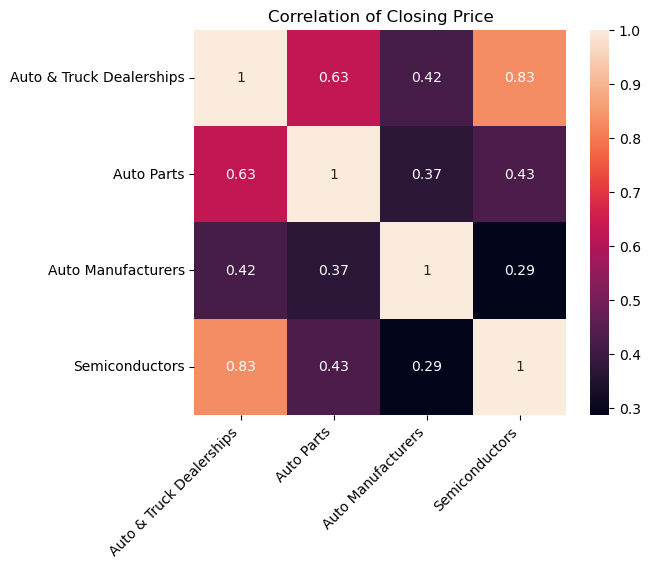

In [11]:
# Plot a heatmap to show the correlation
plt.figure(figsize=(6,5))
sbn.heatmap(correlation_matrix, annot = True)
plt.xticks(rotation = 45, ha='right')
plt.title('Correlation of Closing Price')
plt.savefig("automobile_correlation.png")

The r-value is: 0.83


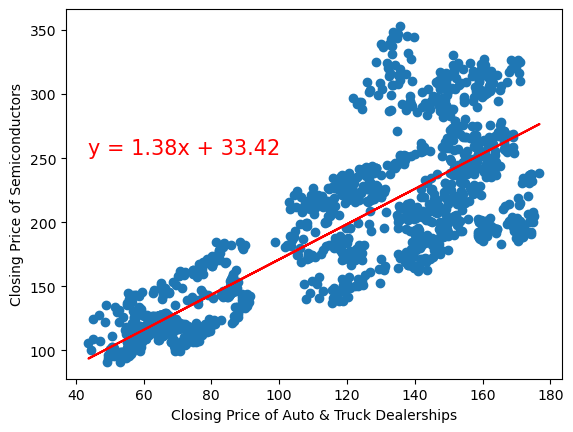

In [12]:
# Find a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(merged_df['Auto & Truck Dealerships'], merged_df['Semiconductors'])

# Form the linear equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Find the regression values based on the line equation
regressed_values = (slope * merged_df['Auto & Truck Dealerships']) + intercept

# Plot the scatter plot and linear regression
x_axis = merged_df['Auto & Truck Dealerships']
y_axis = merged_df['Semiconductors']
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regressed_values, color='r')
plt.annotate(line_eq, (min(x_axis), max(y_axis)-100), fontsize=15, color='red')
plt.xlabel("Closing Price of Auto & Truck Dealerships")
plt.ylabel("Closing Price of Semiconductors")
correlation_coefficient = f'The r-value is: {rvalue:.2f}'
print(correlation_coefficient)